In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt

from scipy.io import loadmat
from keras.models import load_model

import PIL
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/j.zip"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_7935.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_7937.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8042.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8166.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8174.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8178.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8209.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8319.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8382.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_8397.jpg  
  inflating: Nouveau dossier/train/n02111500-Great_Pyrenees/n02111500_855.jpg  
  inflating: Nouveau dossier/tra

In [4]:
def affichage(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [5]:
results_CNN = pd.DataFrame({})
def errors_CNN(name,model,x_train,x_val,x_test):
    global results_CNN
    train=model.evaluate(x_train)
    val=model.evaluate(x_val)
    test=model.evaluate(x_test)
    results_CNN= results_CNN.append(pd.DataFrame({
        'Modèle': [name],
        'acc':train[1],
        'val_acc':val[1],
        'evaluate(x_test)_acc':test[1],
        'loss':train[0],
        'val_loss':val[0],
        'evaluate(x_test)_loss':test[0],
        }))

In [6]:
batch_size = 64 
num_classes = 120
size=150
epochs=50

# Transfert learning

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input as Xception_preprocessor

from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)

In [9]:
results = pd.DataFrame({})
def errors(name,model,x_train,x_val,x_test):
    global results
    train=model.evaluate(x_train)
    val=model.evaluate(x_val)
    test=model.evaluate(x_test)
    results = results.append(pd.DataFrame({
        'Modèle': [name],
        'acc':train[1],
        'val_acc':val[1],
        'evaluate(x_test)_acc':test[1],
        'loss':train[0],
        'val_loss':val[0],
        'evaluate(x_test)_loss':test[0],
        }))

ResNet50, preprocess_input sur les données de validation, des couches ont été ajoutées au model, l'optimizeur est Nadam

In [14]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50,
                                   rotation_range=45,
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.3,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50)

fpath = "/content/data/train"
x_train = train_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/val'
x_val = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/test'
x_test = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

Found 13091 images belonging to 120 classes.
Found 3327 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.


Found 13091 images belonging to 120 classes.
Found 3327 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.
Epoch 1/1000
205/205 [==============================] - 114s 538ms/step - loss: 2.8369 - accuracy: 0.3784 - val_loss: 1.6091 - val_accuracy: 0.5966
Epoch 2/1000
205/205 [==============================] - 108s 525ms/step - loss: 2.0579 - accuracy: 0.5146 - val_loss: 1.5738 - val_accuracy: 0.6102
Epoch 3/1000
205/205 [==============================] - 108s 529ms/step - loss: 1.8987 - accuracy: 0.5463 - val_loss: 1.5108 - val_accuracy: 0.6297
Epoch 4/1000
205/205 [==============================] - 107s 523ms/step - loss: 1.7999 - accuracy: 0.5715 - val_loss: 1.4980 - val_accuracy: 0.6300
Epoch 5/1000
205/205 [==============================] - 107s 522ms/step - loss: 1.7321 - accuracy: 0.5808 - val_loss: 1.5061 - val_accuracy: 0.6303
Epoch 6/1000
205/205 [==============================] - 106s 519ms/step - loss: 1.6576 - accuracy: 0.6009 - val_loss: 1.4787 - 

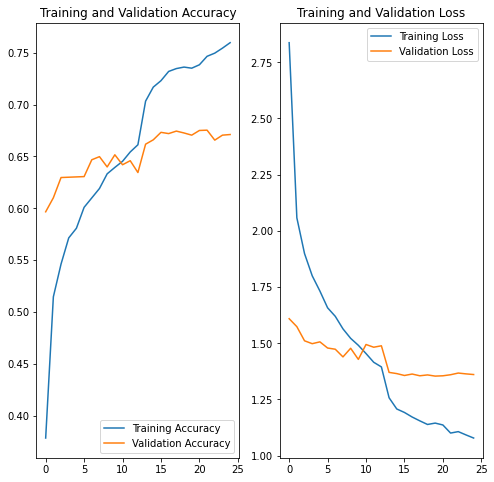

66/66 [==============================] - 15s 225ms/step - loss: 1.3987 - accuracy: 0.6701


[1.3986704349517822, 0.6701105237007141]

In [17]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(size, size, 3))

base_model.trainable = False


inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x=Dropout(0.3)(x)

x= Dense(1024, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x= Dense(562, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)

outputs=Dense(120,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
model_ResNet50= keras.Model(inputs, outputs)

model_ResNet50.compile(optimizer= 'Nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

history_ResNet50=model_ResNet50.fit(x_train,epochs=1000,validation_data=(x_val), callbacks=[early_stopping, reduce_lr])

affichage(history_ResNet50) 
model_ResNet50.evaluate(x_test)


In [23]:

model_ResNet50.save('/content/drive/MyDrive/model_ResNet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [12]:
model_ResNet50 = load_model('/content/drive/MyDrive/model_ResNet50.h5')

In [17]:
history = model_ResNet50.fit_generator(
 x_train,
 steps_per_epoch=100,
 epochs=100,
 validation_data=x_val,
 validation_steps=50,
 callbacks=[reduce_lr])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 69s 691ms/step - loss: 1.0895 - accuracy: 0.7553 - val_loss: 1.3285 - val_accuracy: 0.6865
Epoch 2/100
100/100 [==============================] - 69s 700ms/step - loss: 1.0608 - accuracy: 0.7674 - val_loss: 1.3798 - val_accuracy: 0.6583
Epoch 3/100
100/100 [==============================] - 67s 679ms/step - loss: 1.0704 - accuracy: 0.7586 - val_loss: 1.3715 - val_accuracy: 0.6790
Epoch 4/100
100/100 [==============================] - 68s 684ms/step - loss: 1.0866 - accuracy: 0.7555 - val_loss: 1.3629 - val_accuracy: 0.6686

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 5/100
100/100 [==============================] - 68s 686ms/step - loss: 1.0718 - accuracy: 0.7578 - val_loss: 1.3336 - val_accuracy: 0.6718
Epoch 6/100
100/100 [==============================] - 66s 665ms/step - loss: 1.0455 - accuracy: 0.7688 - val_loss: 1.3587 - val_accuracy: 0.6761
Epoch 7/100
100/100 [=====================

ResNet50, preprocess_input sur les données de validation, des couches ont été ajoutées au model, kernel_regularizer = L2, l'optimizeur est Nadam

Found 13091 images belonging to 120 classes.
Found 3327 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.
Epoch 1/1000
205/205 [==============================] - 122s 576ms/step - loss: 4.3880 - accuracy: 0.3755 - val_loss: 2.7713 - val_accuracy: 0.5798
Epoch 2/1000
205/205 [==============================] - 119s 582ms/step - loss: 2.9457 - accuracy: 0.4953 - val_loss: 2.3074 - val_accuracy: 0.5855
Epoch 3/1000
205/205 [==============================] - 113s 550ms/step - loss: 2.6476 - accuracy: 0.5050 - val_loss: 2.2052 - val_accuracy: 0.5864
Epoch 4/1000
205/205 [==============================] - 109s 533ms/step - loss: 2.5127 - accuracy: 0.5171 - val_loss: 2.1765 - val_accuracy: 0.5876
Epoch 5/1000
205/205 [==============================] - 112s 544ms/step - loss: 2.4454 - accuracy: 0.5259 - val_loss: 2.0970 - val_accuracy: 0.5993
Epoch 6/1000
205/205 [==============================] - 113s 550ms/step - loss: 2.3951 - accuracy: 0.5315 - val_loss: 2.0880 - 

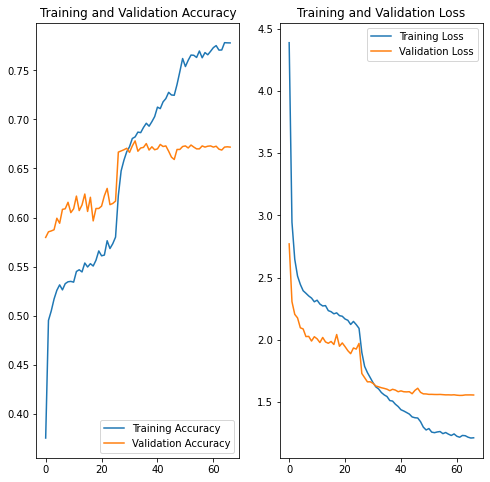

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [32]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50,
                                   rotation_range=45,
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.3,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50)

fpath = "/content/data/train"
x_train = train_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/val'
x_val = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/test'
x_test = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(size, size, 3))

base_model.trainable = False


inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x=Dropout(0.3)(x)

x= Dense(1024, use_bias=False, kernel_initializer='uniform',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x= Dense(562, use_bias=False, kernel_initializer='uniform',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)

outputs=Dense(120,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
model_ResNet50_2= keras.Model(inputs, outputs)

model_ResNet50_2.compile(optimizer= 'Nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

history_ResNet50_2=model_ResNet50_2.fit(x_train,epochs=1000,validation_data=(x_val), callbacks=[early_stopping, reduce_lr])

affichage(history_ResNet50_2) 
model_ResNet50_2.save('/content/drive/MyDrive/model_ResNet50_2.h5')

ResNet50_Rescale_Nadam
ResNet50, normalisation des données de validation, sans couches ajoutées, l'optimizeur est Nadam

Found 13091 images belonging to 120 classes.
Found 3327 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.
Epoch 1/1000
205/205 [==============================] - 114s 543ms/step - loss: 3.5230 - accuracy: 0.2571 - val_loss: 5.0488 - val_accuracy: 0.0087
Epoch 2/1000
205/205 [==============================] - 108s 528ms/step - loss: 2.3077 - accuracy: 0.4413 - val_loss: 5.0759 - val_accuracy: 0.0108
Epoch 3/1000
205/205 [==============================] - 108s 528ms/step - loss: 2.0837 - accuracy: 0.4892 - val_loss: 5.1221 - val_accuracy: 0.0075
Epoch 4/1000
205/205 [==============================] - 109s 531ms/step - loss: 1.9337 - accuracy: 0.5178 - val_loss: 5.1528 - val_accuracy: 0.0081

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/1000
205/205 [==============================] - 109s 534ms/step - loss: 1.5768 - accuracy: 0.5819 - val_loss: 5.1507 - val_accuracy: 0.0078
Epoch 6/1000
205/205 [=======================

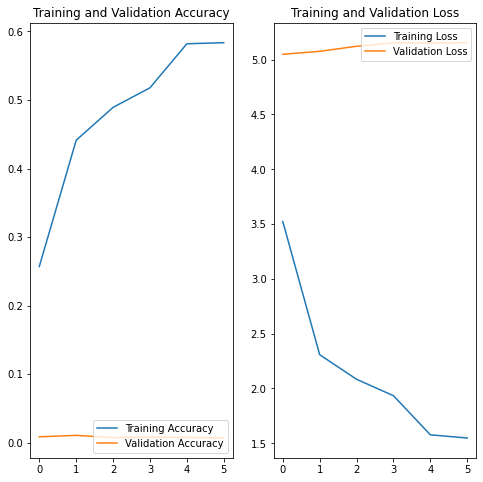

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [33]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50,
                                   rotation_range=45,
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.3,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

fpath = "/content/data/train"
x_train = train_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/val'
x_val = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/test'
x_test = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(size, size, 3))

base_model.trainable = False


inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x=Dropout(0.3)(x)

#x= Dense(1024, use_bias=False, kernel_initializer='uniform')(x)
#x=BatchNormalization()(x)    
#x=Activation("relu")(x)

#x= Dense(562, use_bias=False, kernel_initializer='uniform')(x)
#x=Activation("relu")(x)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)

outputs=Dense(120,activation='softmax')(x)
model_ResNet50_3= keras.Model(inputs, outputs)

model_ResNet50_3.compile(optimizer= 'Nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

history_ResNet50_3=model_ResNet50_3.fit(x_train,epochs=1000,validation_data=(x_val), callbacks=[early_stopping, reduce_lr])

affichage(history_ResNet50_3) 
model_ResNet50_3.save('/content/drive/MyDrive/model_ResNet50_3.h5')

InceptionV3, preprocess_input sur les données de validation, sans couches ajoutées, l'optimizeur est Nadam

Found 13091 images belonging to 120 classes.
Found 3327 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.
Epoch 1/1000
205/205 [==============================] - 116s 537ms/step - loss: 4.3782 - accuracy: 0.2628 - val_loss: 1.9903 - val_accuracy: 0.5597
Epoch 2/1000
205/205 [==============================] - 108s 529ms/step - loss: 3.3656 - accuracy: 0.3843 - val_loss: 1.9558 - val_accuracy: 0.5933
Epoch 3/1000
205/205 [==============================] - 109s 531ms/step - loss: 3.2053 - accuracy: 0.4094 - val_loss: 2.0241 - val_accuracy: 0.5741
Epoch 4/1000
205/205 [==============================] - 108s 529ms/step - loss: 3.0140 - accuracy: 0.4291 - val_loss: 1.9698 - val_accuracy: 0.5948
Epoch 5/1000
205/205 [==============================] - 108s 525ms/step - loss: 3.0259 - accuracy: 0.4286 - val_loss: 2.0447 - val_accuracy: 0.5879

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/1000
205/205 [=======================

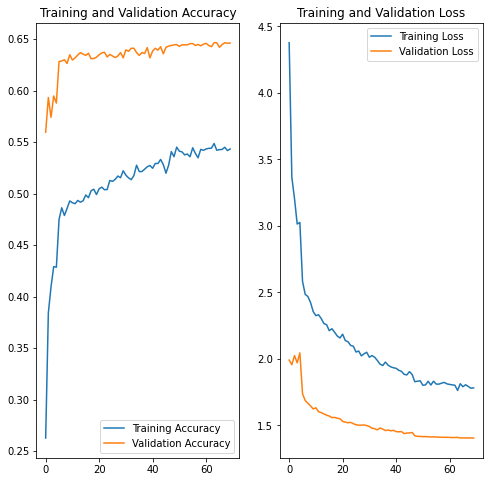

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=inception_v3_preprocessor,
                                   rotation_range=45,
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.3,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=inception_v3_preprocessor)

fpath = "/content/data/train"
x_train = train_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/val'
x_val = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

fpath= '/content/data/test'
x_test = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size))

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(size, size, 3))

base_model.trainable = False


inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x=Dropout(0.3)(x)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)

outputs=Dense(120,activation='softmax')(x)
model_InceptionV3= keras.Model(inputs, outputs)

model_InceptionV3.compile(optimizer= 'Nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

history_inception=model_InceptionV3.fit(x_train,epochs=1000,validation_data=(x_val), callbacks=[early_stopping, reduce_lr])

affichage(history_inception) 
model_InceptionV3.save('/content/drive/MyDrive/model_InceptionV3.h5')

Xception, preprocess_input sur les données de validation, des couches ont été ajoutées au model, l'optimizeur est Adam

Found 13091 images belonging to 120 classes.
Found 3327 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.
83689472/83683744 [==============================] - 2s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 2048)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 5, 5, 1024)        2097152   
_________________________________________________________________
batch_normalization_98 (Batc (None, 5, 5, 1024)        4096      
___________________________________________________________

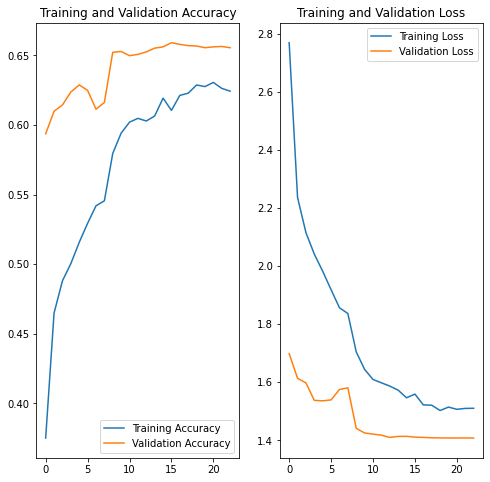

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=Xception_preprocessor,
                                   rotation_range=45,
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.3,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=Xception_preprocessor)

fpath = "/content/data/train"
x_train = train_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size),
    seed=123)

fpath= '/content/data/val'
x_val = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size),
    seed=123)

fpath= '/content/data/test'
x_test = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= batch_size,
    target_size=(size, size),
    seed=123)

base_model = keras.applications.Xception(
    weights='imagenet', 
    input_shape=(size, size, 3),
    include_top=False) 

base_model.trainable = False


inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x=Dropout(0.3)(x)

x= Dense(1024, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x= Dense(562, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)

outputs=Dense(120,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
model_x = keras.Model(inputs, outputs)

print(model_x.summary())

model_x.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)
history_x=model_x.fit(x_train,epochs=1000,validation_data=(x_val), callbacks=[early_stopping, reduce_lr])
affichage(history_x)
model_x.save('/content/drive/MyDrive/model_x.h5')

Xception, preprocess_input sur les données de validation, des couches differentes ont été ajoutées au model, l'optimizeur est un Adam(learning_rate=0.001)

Found 13091 images belonging to 120 classes.
Found 3327 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
batch_normalization_114 (Bat (None, 5, 5, 2048)        8192      
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              209

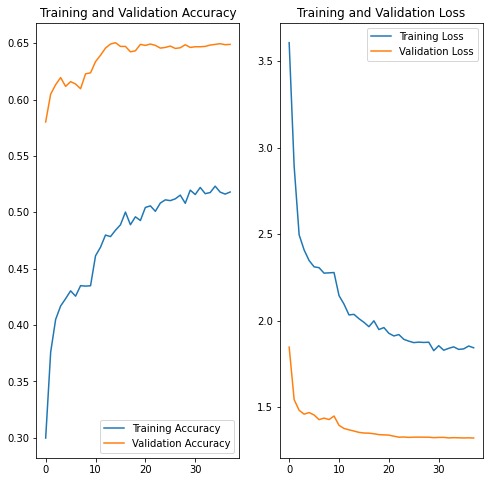

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [19]:
train_datagen = ImageDataGenerator(preprocessing_function=Xception_preprocessor,
                                   rotation_range=45,
                                   horizontal_flip = True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.3,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=Xception_preprocessor)


fpath = "/content/data/train"
x_train = train_datagen.flow_from_directory(
    fpath,  
    shuffle= True,
    class_mode="categorical", 
    batch_size= 32,
    target_size=(size, size))

fpath= '/content/data/val'
x_val = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    class_mode="categorical",
    batch_size= 32,
    target_size=(size, size))

fpath= '/content/data/test'
x_test = valid_datagen.flow_from_directory(
    fpath,  
    shuffle= True, 
    batch_size= 32,
    target_size=(size, size))

base_model =Xception(
    weights='imagenet', 
    input_shape=(size, size, 3),
    include_top=False) 

for layer in base_model.layers:
    layer.trainable = False
inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

outputs=Dense(120,activation='softmax')(x)
model_Xception = keras.Model(inputs, outputs)

print(model_Xception.summary())

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_Xception.compile(optimizer = optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)
history_Xception=model_Xception.fit(x_train,epochs=50,validation_data=(x_val), callbacks=[early_stopping, reduce_lr])
affichage(history_Xception)
model_Xception.save('/content/drive/MyDrive/model_Xception.h5')